In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('../../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']]

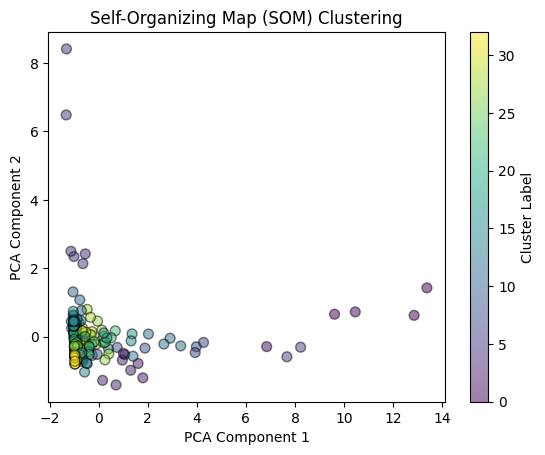

In [7]:
features_scaled_arr = features_scaled.values
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled_arr)

som_dim = (6, 6)  
som = MiniSom(som_dim[0], som_dim[1], features_scaled_arr.shape[1], sigma=2.0, learning_rate=0.05)
som.random_weights_init(features_scaled_arr)  
som.train_batch(features_scaled_arr, 5000)

som_labels = np.array([som.winner(x) for x in features_scaled_arr])

unique_labels = {tuple(coord): idx for idx, coord in enumerate(np.unique(som_labels, axis=0))}
df['som_cluster'] = [unique_labels[tuple(coord)] for coord in som_labels]

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['som_cluster'], cmap='viridis', s=50, edgecolor='k',alpha=0.5)
plt.title("Self-Organizing Map (SOM) Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")  
plt.show()

In [ ]:
unique_winners = np.unique(som_labels, axis=0)
num_clusters = len(unique_winners)
print(f"Number of clusters in the SOM: {num_clusters}")
# the result is overfitting

Number of clusters in the SOM: 33


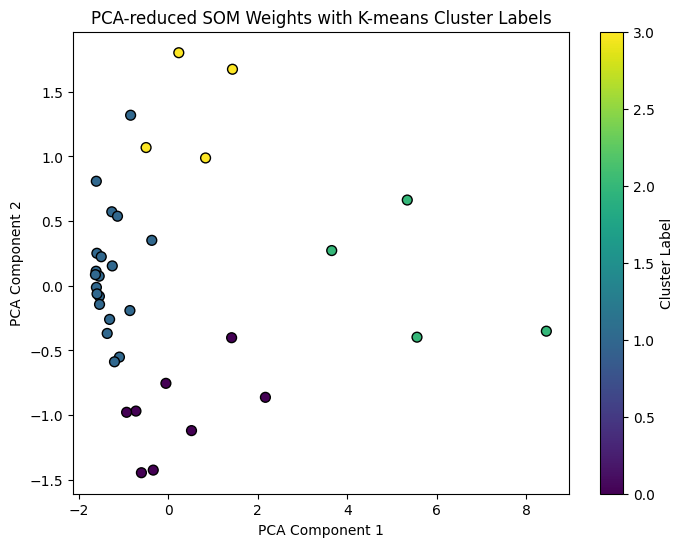

In [10]:
# use kmeans to make it better

som_weights = som.get_weights().reshape(-1, som.get_weights().shape[-1])
kmeans = KMeans(n_clusters=4)  
som_clusters = kmeans.fit_predict(som_weights)

som_labels = som_clusters.reshape(som_dim[0], som_dim[1])
pca = PCA(n_components=2)
reduced_som_weights = pca.fit_transform(som_weights)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_som_weights[:, 0], reduced_som_weights[:, 1], c=som_clusters, cmap='viridis', s=50, edgecolor='k')
plt.title("PCA-reduced SOM Weights with K-means Cluster Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [12]:
score = silhouette_score(som_weights, som_clusters)
print(score)

0.4235006960669825
